# Imports

In [12]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs
import numpy as np

# Dataset

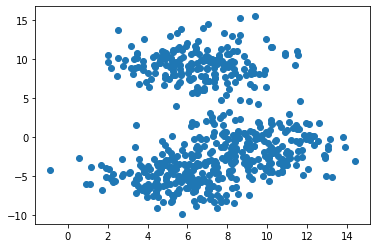

In [13]:
s=600
X, y = make_blobs(n_samples=s, cluster_std=2, random_state=13) #12
plt.scatter(X[:, 0], X[:, 1])
plt.show()


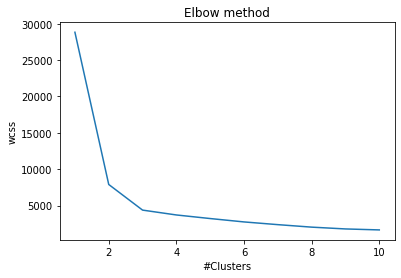

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('#Clusters')
plt.ylabel('wcss')
plt.show()

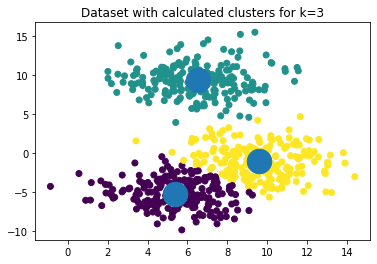

In [15]:
kmeans = KMeans(n_clusters=3)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_.astype(float))
plt.title('Dataset with calculated clusters for k=3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=s)

In [16]:
#gen initial centroids
rand = 12
k = 3
#init = np.random.randn(3, 2)

init = np.random.uniform(low=-12, high=12, size=(k,2))

In [30]:
m = 30
kmeans = KMeans(n_clusters=k, max_iter=1, init=init, n_init=1)
filenames = []

plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset with calculated clusters for k=3')
plt.scatter(init[:, 0], init[:, 1], s=s)

# create file name and append it to a list
#filename1 = f'generated_plots/{-2}.png'
#filename2 = f'generated_plots/{-1}.png'
filename3 = f'generated_plots/{0}.png'
#filenames.append(filename1)
#filenames.append(filename2)
filenames.append(filename3)
#plt.xlim([-12, 12])
#plt.ylim([-12, 12])
#plt.savefig(filename1)
#plt.savefig(filename2)
plt.savefig(filename3)
plt.close()

cluster_prev = None

for i in range(1, m):
    
    pred_y = kmeans.fit_predict(X)
    
    if i != 1: 
        if cluster_prev is kmeans.cluster_centers_ : 
            break

    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_.astype(float))
    plt.title('Dataset with calculated clusters for k='+str(k))
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=s)

    # create file name and append it to a list
    filename = f'generated_plots/{i}.png'
    filenames.append(filename)

    #plt.xlim([-12, 12])
    #plt.ylim([-12, 12])
    plt.savefig(filename)
    plt.close()
    if i != 1:
        cluster_prev = kmeans.cluster_centers_

    kmeans = KMeans(n_clusters=k, max_iter=1, init=kmeans.cluster_centers_, n_init=1)

    

    
    
    
buildGIF(filenames, delete=False)
buildGIF2(filenames, delete=True, fps=1)

/tmp/ipykernel_33691/2166080932.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


# Utilities

In [21]:
#source: https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30
import os
import imageio

In [19]:
def buildGIF(filenames, delete=True):
    with imageio.get_writer('mygif.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    if delete:
        # Remove files
        for filename in set(filenames):
            os.remove(filename)

In [20]:
def buildGIF2(filenames, delete=True, fps=4):
    images = []
    for filename in filenames:
        image = imageio.imread(filename)
        images.append(image)
    imageio.mimsave('slow_gif.gif', images, fps=fps)
    if delete:
        # Remove files
        for filename in set(filenames):
            os.remove(filename)